In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
df = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Deaths.csv")

In [40]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df=df.drop(['Province/State','Country/Region','Lat','Long'], axis = 1)
#ตัดข้อมูลที่ไม่ต้องการ เพราะต้องการแสดงแค่จำนวนคนป่วยสะสมที่เพิ่มขึ้นตามวัน
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df =df.transpose()
#transpose เพื่อเปลี่ยนมุมมองให้ดูง่ายและปรับเปลี่ยนสิ่งต่างๆง่ายขึ้น

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df["sum"] = df.sum(axis=1)
#หาผลรวมผู้ป่วยสะสมในแต่ละวัน

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,433,434,435,436,437,438,439,440,441,sum
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56


In [46]:
total = df["sum"]
#เตรียมคอลัมน์ sum มาใช้เป็น y
total.head()

1/22/20    17
1/23/20    18
1/24/20    26
1/25/20    42
1/26/20    56
Name: sum, dtype: int64

In [47]:
row=len(total.index)
row
#len เพื่อหาจำนวนแถวทั้งหมด

53

In [48]:
y = (np.log(total)).replace(-np.inf, 0)
#take log เพื่อปรับให้ค่าน้อยลง

In [49]:
day = np.arange(row)
#สร้าง array สำหรับเป็น แกน x โดยจะเท่ากับ

In [50]:
day

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [51]:
x = pd.DataFrame(day,columns=['days'])
#นำ array day มาเปลี่ยนเป็น dataFrame 

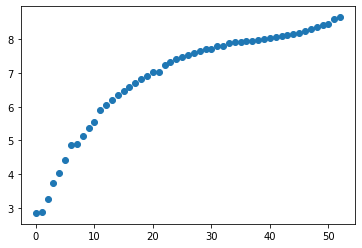

In [52]:
plt.scatter(x,y)
plt.show()
#plt.savefig('scatter_covid-19.png')

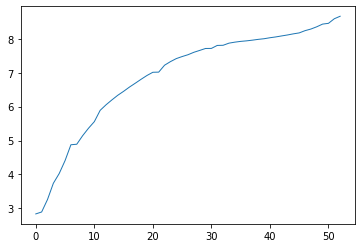

In [53]:
plt.plot(x,y,linewidth=1)
plt.show()
#plt.savefig('line.png')